<a href="https://colab.research.google.com/github/kachiO/TTS-examples/blob/main/Copy_of_VCTK_Tacotron2_DDC_WaveGrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Speaker TTS Model

**Dataset:** VCTK

**TTS Model:** Tacotron2 with DDC - https://erogol.com/solving-attention-problems-of-tts-models-with-double-decoder-consistency/

**Vocoder:** WaveGrad - https://arxiv.org/abs/2009.00713

**Speaker Encoder:** https://arxiv.org/abs/1710.10467 with AngleProto Loss 

(Thanks to [Nicolas Müller](https://github.com/mueller91) and  [Edresson Casanova](https://github.com/Edresson) for their help)

In [ ]:
!sudo apt install espeak

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  espeak-data libespeak1 libportaudio2 libsonic0
The following NEW packages will be installed:
  espeak espeak-data libespeak1 libportaudio2 libsonic0
0 upgraded, 5 newly installed, 0 to remove and 12 not upgraded.
Need to get 1,219 kB of archives.
After this operation, 3,031 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libportaudio2 amd64 19.6.0-1 [64.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsonic0 amd64 0.2.0-6 [13.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 espeak-data amd64 1.48.04+dfsg-5 [934 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libespeak1 amd64 1.48.04+dfsg-5 [145 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd64 espeak amd64 1.48.04+dfsg-5 [61.6 kB]
Fetched 1,219 kB in 1s (1,491 kB/s)
d

In [ ]:
!git clone https://github.com/Mozilla/TTS TTS_repo
%cd TTS_repo
!git checkout ea976b0
!pip install -r requirements.txt
!python setup.py install
%cd ..

Cloning into 'TTS_repo'...
remote: Enumerating objects: 92, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 9953 (delta 45), reused 62 (delta 33), pack-reused 9861
Receiving objects: 100% (9953/9953), 120.03 MiB | 31.51 MiB/s, done.
Resolving deltas: 100% (6900/6900), done.
/content/TTS_repo
Note: checking out 'ea976b0'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at ea976b0 python compat update for contextlib
     |████████████████████████████████| 320.4MB 54kB/s 
     |████████████████████████████████| 1.6MB 52.0MB/s 
     |█████████████████████████████

In [ ]:
# download VCTK 
# !wget https://www.dropbox.com/s/9n8sd97qvjijqa1/VCTK-Corpus-Removed-Silence.zip

# TTS files
!gdown --id 1LOp9NMpxQzobRiQkEq32B11_uu6g06Ma -O tts_model.pth.tar
!gdown --id 1RuS5YEX0_DWPQo7Od_o7_9YGBBflDM1w -O tts_config.json
!gdown --id 1BHmVmi4gTLZE5ITE9EwCTNJT2x-9Uygj -O tts_scale_stats.npy
!gdown --id 1AZAWxW67MRgKNTeYvWcLBN_RN-D8B-iJ -O speakers.json

# VOCODER files
!gdown --id 1r2g90JaZsfCj9dJkI9ioIU6JCFMPRqi6 -O vocoder_model.pth.tar
!gdown --id 1POrrLf5YEpZyjvWyMccj1nGCVc94mR6s -O vocoder_config.json
!gdown --id 1Vwbv4t-N1i3jXqI0bgKAhShAEO097sK0 -O vocoder_scale_stats.npy

Downloading...
From: https://drive.google.com/uc?id=1LOp9NMpxQzobRiQkEq32B11_uu6g06Ma
To: /content/tts_model.pth.tar
616MB [00:05, 105MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1RuS5YEX0_DWPQo7Od_o7_9YGBBflDM1w
To: /content/tts_config.json
100% 12.6k/12.6k [00:00<00:00, 13.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BHmVmi4gTLZE5ITE9EwCTNJT2x-9Uygj
To: /content/tts_scale_stats.npy
100% 10.4k/10.4k [00:00<00:00, 13.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AZAWxW67MRgKNTeYvWcLBN_RN-D8B-iJ
To: /content/speakers.json
418MB [00:06, 69.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1r2g90JaZsfCj9dJkI9ioIU6JCFMPRqi6
To: /content/vocoder_model.pth.tar
190MB [00:01, 98.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1POrrLf5YEpZyjvWyMccj1nGCVc94mR6s
To: /content/vocoder_config.json
100% 5.79k/5.79k [00:00<00:00, 7.17MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Vwbv4t-N1i3jXqI0bgKAhShAEO097sK0
To: /content/vo

In [ ]:
import os
import sys
import io
import torch 
import time
import json
import yaml

sys.path.append("TTS_repo")

import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,5)

import librosa
import librosa.display

from TTS.tts.models.tacotron import Tacotron 
from TTS.tts.layers import *
from TTS.tts.utils.data import *
from TTS.utils.audio import AudioProcessor
from TTS.utils.io import load_config
from TTS.tts.utils.io import load_checkpoint
from TTS.utils.generic_utils import count_parameters
from TTS.tts.utils.generic_utils import setup_model
from TTS.tts.utils.text import text_to_sequence
from TTS.tts.utils.synthesis import synthesis
from TTS.tts.utils.visual import visualize
from TTS.tts.utils.text.symbols import symbols, phonemes, make_symbols
from TTS.utils.generic_utils import count_parameters
from TTS.vocoder.utils.generic_utils import setup_generator

import IPython
from IPython.display import Audio

import os

# you may need to change this depending on your system
os.environ['CUDA_VISIBLE_DEVICES']='0'
%matplotlib inline

In [ ]:
def interpolate_vocoder_input(scale_factor, spec):
    print(" > before interpolation :", spec.shape)
    spec = torch.tensor(spec).unsqueeze(0).unsqueeze(0)
    spec = torch.nn.functional.interpolate(spec, scale_factor=scale_factor, mode='bilinear').squeeze(0)
    print(" > after interpolation :", spec.shape)
    return spec


def get_speaker_embedding(speaker_ids, speaker_mapping, num_samples):
    speaker_embeddings = []
    for speaker_id in speaker_ids:
        for key in list(speaker_mapping.keys()):
            if speaker_id in key:
                speaker_embeddings.append(speaker_mapping[key]['embedding']) 
                if len(speaker_embeddings) > num_samples:
                    break
    # takes the average of the embedings samples of the announcers
    speaker_embedding = np.mean(np.array(speaker_embeddings), axis=0)
    return speaker_embedding
    

def tts(model, text, CONFIG, use_cuda, ap, use_gl, figures=True, file_name=None, speaker_id=None, speaker_embedding=None):
    t_1 = time.time()
    waveform, alignment, mel_spec, mel_postnet_spec, stop_tokens, inputs = synthesis(model,
                                                                                     text,
                                                                                     CONFIG,
                                                                                     use_cuda,
                                                                                     ap,
                                                                                     speaker_id,
                                                                                     None,
                                                                                     False,
                                                                                     CONFIG.enable_eos_bos_chars,
                                                                                     use_gl,
                                                                                     speaker_embedding=speaker_embedding)
    if CONFIG.model == "Tacotron" and not use_gl:
        # coorect the normalization differences b/w TTS and the Vocoder.
        mel_postnet_spec = ap.out_linear_to_mel(mel_postnet_spec.T).T
    mel_postnet_spec = ap._denormalize(mel_postnet_spec.T).T
    if not use_gl:
        vocoder_input = ap_vocoder._normalize(mel_postnet_spec.T)
        if scale_factor[1] != 1:
            vocoder_input = interpolate_vocoder_input(scale_factor, vocoder_input)
        else:
            vocoder_input = torch.tensor(vocoder_input).unsqueeze(0)
        waveform = vocoder_model.inference(vocoder_input.to(vocoder_model.y_conv.weight))
    if use_cuda and not use_gl:
        waveform = waveform.cpu()
    if not use_gl:
        waveform = waveform.numpy()
    waveform = waveform.squeeze()
    rtf = (time.time() - t_1) / (len(waveform) / ap.sample_rate)
    tps = (time.time() - t_1) / len(waveform)
    print(waveform.shape)
    print(" > Run-time: {}".format(time.time() - t_1))
    print(" > Real-time factor: {}".format(rtf))
    print(" > Time per step: {}".format(tps))
    print("max- ", mel_postnet_spec.max(), " -- min- ", mel_postnet_spec.min())
    if figures:  
        if mel_spec is not None:
            mel_spec = ap._denormalize(mel_spec.T).T
        fig = visualize(alignment, mel_postnet_spec, text, ap.hop_length, CONFIG, stop_tokens, mel_spec, figsize=[32,16], output_fig=True)                                                                       
    IPython.display.display(Audio(waveform, rate=VOCODER_CONFIG.audio['sample_rate']))  
    os.makedirs(OUT_FOLDER, exist_ok=True)
    if file_name is None:
        file_name = text.replace(" ", "_").replace(".","") + ".wav"
    out_path = os.path.join(OUT_FOLDER, file_name)
    ap.save_wav(waveform, out_path)
    return alignment, mel_postnet_spec, stop_tokens, waveform

In [ ]:
##### Set constants
MODEL_PATH = 'tts_model.pth.tar'
CONFIG_PATH = 'tts_config.json'

VOCODER_MODEL_PATH = "vocoder_model.pth.tar"
VOCODER_CONFIG_PATH = "vocoder_config.json"
OUT_FOLDER = 'tts-samples'

CONFIG = load_config(CONFIG_PATH)
CONFIG.audio['stats_path'] = 'tts_scale_stats.npy'
VOCODER_CONFIG = load_config(VOCODER_CONFIG_PATH)
VOCODER_CONFIG.audio['stats_path'] = 'vocoder_scale_stats.npy'


# load the audio processor
ap = AudioProcessor(**CONFIG.audio)   
    
# Run FLAGs
use_cuda = True
# Set some config fields manually for testing
# CONFIG.windowing = False
CONFIG.use_forward_attn = False
# Set the vocoder
use_gl = False # use GL if True

 > Setting up Audio Processor...
 | > sample_rate:22050
 | > num_mels:80
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:0
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:True
 | > symmetric_norm:True
 | > mel_fmin:50.0
 | > mel_fmax:7600.0
 | > spec_gain:1.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:True
 | > trim_db:25
 | > do_sound_norm:False
 | > stats_path:tts_scale_stats.npy
 | > hop_length:256
 | > win_length:1024


In [ ]:
# LOAD TTS MODEL
 
# load speakers
# VCTK speakers not seen in training (new speakers)
VCTK_test_Speakers = ["p225", "p234", "p238", "p245", "p248", "p261", "p294", "p302", "p326", "p335", "p347"]

# VCTK speakers seen in training
VCTK_train_Speakers = ['p244', 'p300', 'p303', 'p273', 'p292', 'p252', 'p254', 'p269', 'p345', 'p274', 'p363', 'p285', 'p351', 'p361', 'p295', 'p266', 'p307', 'p230', 'p339', 'p253', 'p310', 'p241', 'p256', 'p323', 'p237', 'p229', 'p298', 'p336', 'p276', 'p305', 'p255', 'p278', 'p299', 'p265', 'p267', 'p280', 'p260', 'p272', 'p262', 'p334', 'p283', 'p247', 'p246', 'p374', 'p297', 'p249', 'p250', 'p304', 'p240', 'p236', 'p312', 'p286', 'p263', 'p258', 'p313', 'p376', 'p279', 'p340', 'p362', 'p284', 'p231', 'p308', 'p277', 'p275', 'p333', 'p314', 'p330', 'p264', 'p226', 'p288', 'p343', 'p239', 'p232', 'p268', 'p270', 'p329', 'p227', 'p271', 'p228', 'p311', 'p301', 'p293', 'p364', 'p251', 'p317', 'p360', 'p281', 'p243', 'p287', 'p233', 'p259', 'p316', 'p257', 'p282', 'p306', 'p341', 'p318']

SPEAKER_JSON = 'speakers.json'
SPEAKER_FILEID = None # if None use the first embedding from speakers.json
if SPEAKER_JSON != '':
    speaker_mapping = json.load(open(SPEAKER_JSON, 'r'))
    num_speakers = len(speaker_mapping)
    if CONFIG.use_external_speaker_embedding_file:
        if SPEAKER_FILEID is not None:
            speaker_embedding = speaker_mapping[SPEAKER_FILEID]['embedding']
        else: # if speaker_fileid is not specificated use the first sample in speakers.json
            choise_speaker = list(speaker_mapping.keys())[0]
            print(" Speaker: ",choise_speaker.split('_')[0],'was chosen automatically', "(this speaker seen in training)")
            speaker_embedding = speaker_mapping[choise_speaker]['embedding']
        speaker_embedding_dim = len(speaker_embedding)
    
if 'characters' in CONFIG.keys():
    symbols, phonemes = make_symbols(**CONFIG.characters)

# load the model
num_chars = len(phonemes) if CONFIG.use_phonemes else len(symbols)
model = setup_model(num_chars, num_speakers, CONFIG, speaker_embedding_dim)      

# load model state
model, _ =  load_checkpoint(model, MODEL_PATH, use_cuda=use_cuda)

# count model parameters 
print(count_parameters(model))
model.eval();

In [ ]:
# LOAD WaveGrad
if use_gl == False:
    vocoder_model = setup_generator(VOCODER_CONFIG)
    cp = torch.load(VOCODER_MODEL_PATH, map_location="cpu")["model"]
    vocoder_model.load_state_dict(cp)
    scale_factor = [1,  VOCODER_CONFIG['audio']['sample_rate'] / ap.sample_rate]
    print(f"scale_factor: {scale_factor}")
    ap_vocoder = AudioProcessor(**VOCODER_CONFIG['audio'])    
    if use_cuda:
        vocoder_model.cuda()
    vocoder_model.eval()
    print(count_parameters(vocoder_model))
    vocoder_model.compute_noise_level(50, 1e-6, 1e-2)

 > Generator Model: wavegrad
scale_factor: [1, 1.08843537414966]
 > Setting up Audio Processor...
 | > sample_rate:24000
 | > num_mels:80
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:0
 | > fft_size:1024
 | > power:None
 | > preemphasis:0.0
 | > griffin_lim_iters:None
 | > signal_norm:True
 | > symmetric_norm:True
 | > mel_fmin:50.0
 | > mel_fmax:7600.0
 | > spec_gain:1.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:True
 | > trim_db:60
 | > do_sound_norm:False
 | > stats_path:vocoder_scale_stats.npy
 | > hop_length:256
 | > win_length:1024
15810401


In [ ]:
speaker_id = VCTK_test_Speakers[1]  ## select the target speaker
speaker_embedding = get_speaker_embedding([speaker_id],  speaker_mapping, 4)
print(speaker_id)

p234


In [ ]:
#Load a sample audio clip from the target speaker if you downloaded the dataset
# for key in speaker_mapping.keys():
#     if speaker_id in key:
#         wav_file = key
#         break
# Audio(filename=f"VCTK-Corpus-removed-silence/wav48/{speaker_id}/{wav_file}")

 > before interpolation : (80, 860)
 > after interpolation : torch.Size([1, 80, 936])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


(239616,)
 > Run-time: 14.848647594451904
 > Real-time factor: 1.366391639637116
 > Time per step: 6.196793749864794e-05
max-  0.068843715  -- min-  -4.48326
ɹiːsənt ɹɪsɜːtʃ at hɑːvəd hɐz ʃəʊn mɛdɪtɛtɪŋfəɹ az lɪtəl az eɪt wiːks, kan aktʃuːəli ɪnkɹiːs ðə ɡɹeɪ matəɹ ɪnðə pɑːts ɒvðə bɹeɪn ɹɪspɒnsəbəl fɔːɹ ɪməʊʃənəl ɹɛɡjuːleɪʃən, and lɜːnɪŋ.


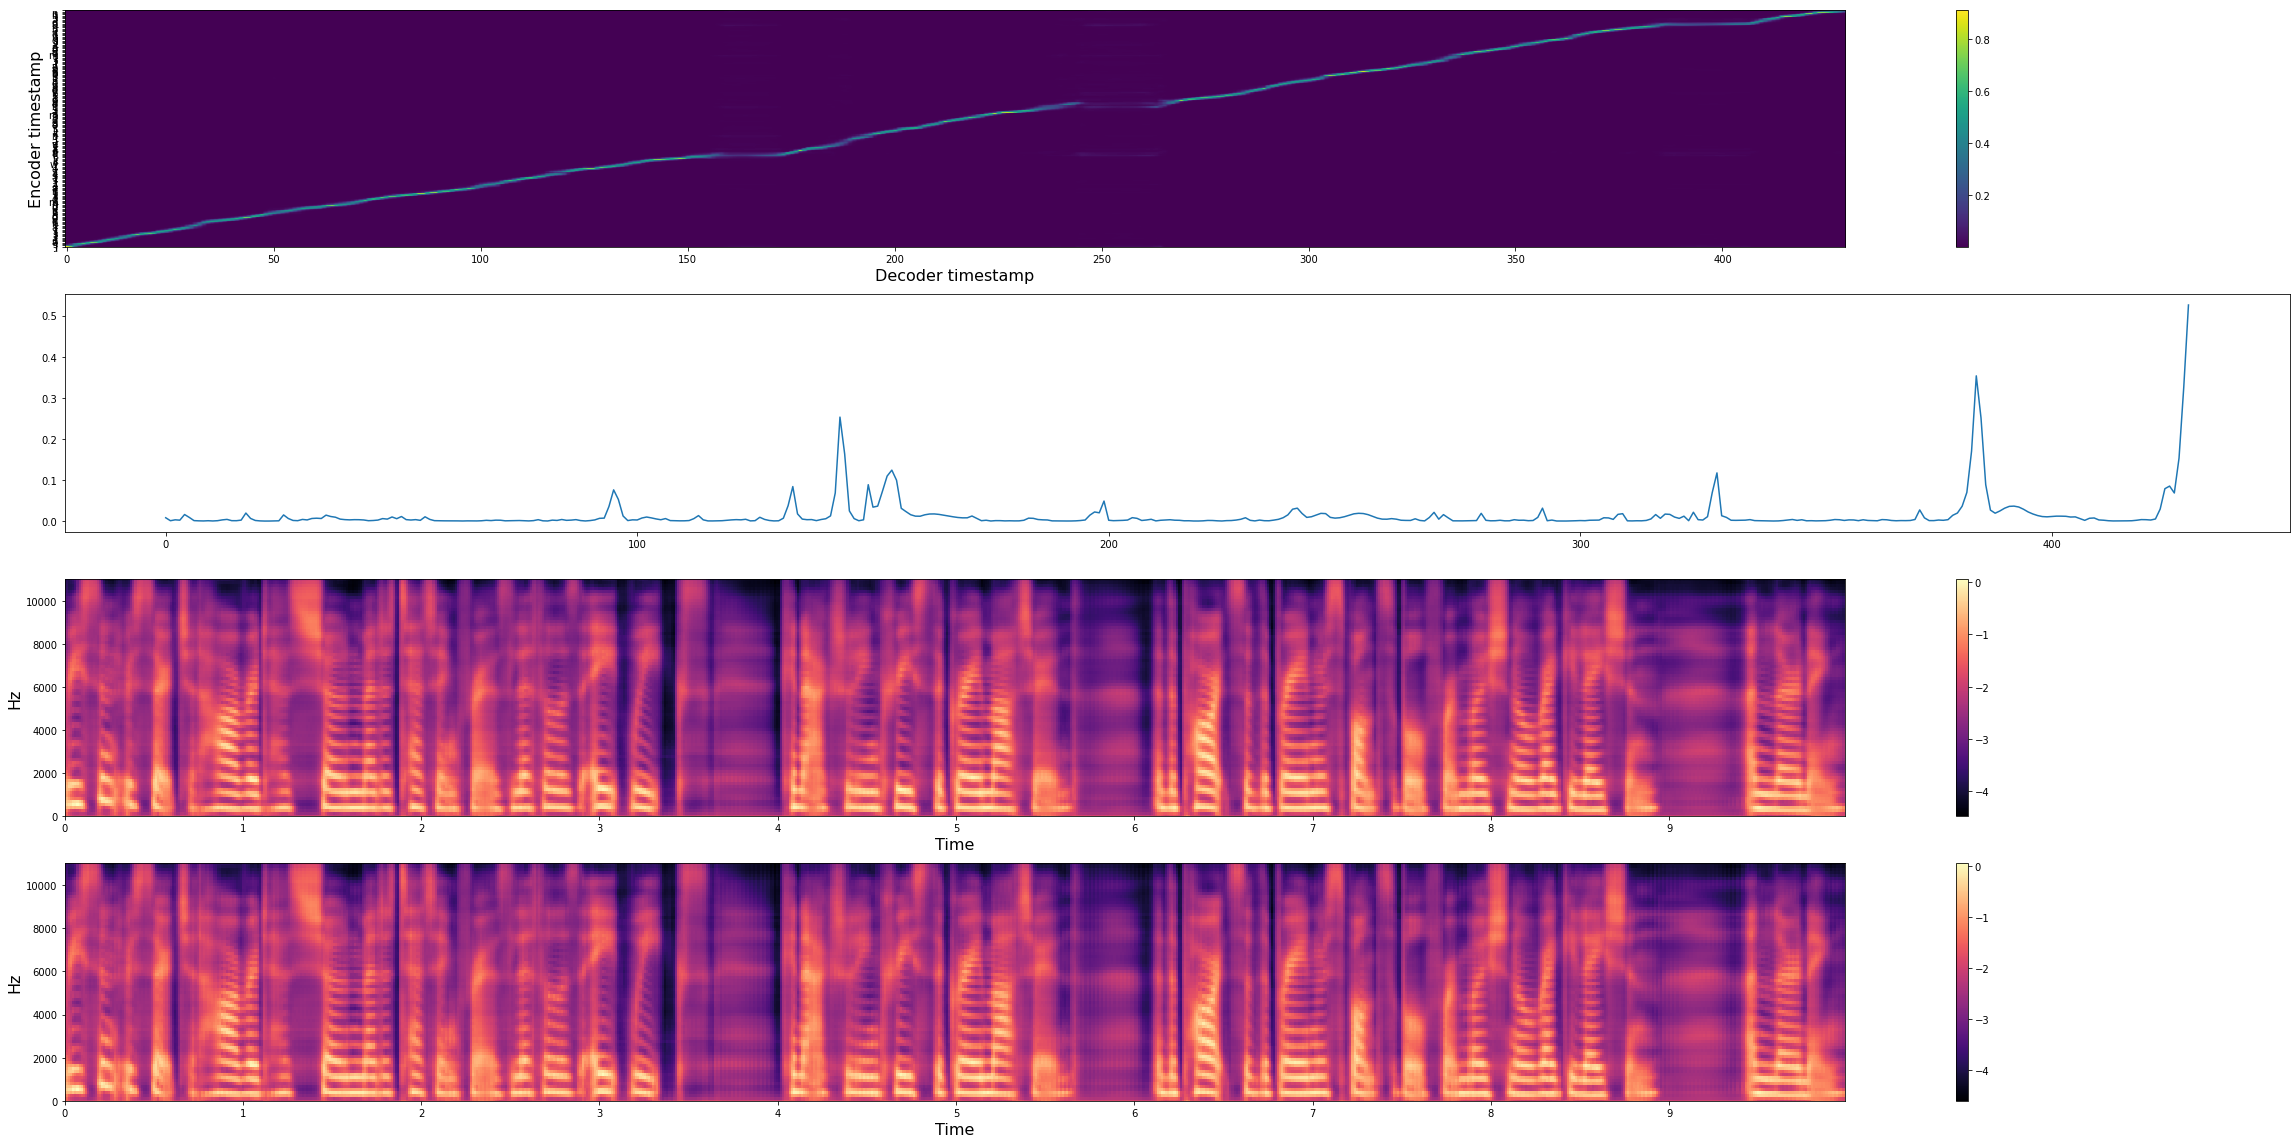

In [ ]:
sentence = "Recent research at Harvard has shown meditating\
for as little as 8 weeks, can actually increase the grey matter in the \
parts of the brain responsible for emotional regulation, and learning."
align, spec, stop_toens, wav = tts(model, sentence, CONFIG, use_cuda, ap, use_gl=use_gl, figures=True, file_name='ls1.wav', speaker_id=None, speaker_embedding=speaker_embedding)